# Predicting IMDB Ratings

## Introduction

For this particular project, I will be IMDb Datasets (https://www.imdb.com/interfaces/). It is a Subset of IMDb data are available for access to customers for personal and non-commercial use. In this there are multiple datasets which define different information about a title or a person involved in the movie. Our main goal here is to predict a movies average rating.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Datasets

The first order of the business will to check the datasets we are working with. Each dataset is contained in a gzipped, tab-separated-values (TSV) formatted file in the UTF-8 character set. The first line in each file contains headers that describe what is in each column. A ‘\N’ is used to denote that a particular field is missing or null for that title/name. We will be working with 2 datasets. 

- title.basics.tsv.gz - Contains the following information for titles:
    + tconst (string) - alphanumeric unique identifier of the title
    + titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
    + primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
    + originalTitle (string) - original title, in the original language
    + isAdult (boolean) - 0: non-adult title; 1: adult title
    + startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
    + endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
    + runtimeMinutes – primary runtime of the title, in minutes
    + genres (string array) – includes up to three genres associated with the title

In [2]:
df_basics = pd.read_csv("data/title.basics.tsv.gz", 
                      compression='gzip', sep="\t",
                       low_memory=False)
df_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [3]:
len(df_basics)

7818270

- title.ratings.tsv.gz – Contains the IMDb rating and votes information for titles
    + tconst (string) - alphanumeric unique identifier of the title
    + averageRating – weighted average of all the individual user ratings
    + numVotes - number of votes the title has received

In [4]:
df_ratings = pd.read_csv("data/title.ratings.tsv.gz", 
                      compression='gzip', sep="\t")
df_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1697
1,tt0000002,6.0,211
2,tt0000003,6.5,1451
3,tt0000004,6.1,123
4,tt0000005,6.1,2246


In [5]:
len(df_ratings)

1141960

Now that we have all the informatation,  we compiled our information into a new dataframe using the tconst variable which defines the alphanumeric unique identifier of the title.

In [6]:
df = pd.merge(df_ratings, df_basics, 
              on="tconst")
df.head()

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,5.7,1697,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,6.0,211,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,6.5,1451,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,6.1,123,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,6.1,2246,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [7]:
df.titleType.value_counts()

tvEpisode       528798
movie           262356
short           131459
tvSeries         75055
video            62266
tvMovie          46873
videoGame        11961
tvMiniSeries     11505
tvSpecial         9582
tvShort           2105
Name: titleType, dtype: int64

We have all sorts of formats in this dataset, but we are only interested in Movies. So get us filter this dataset.

In [8]:
df = df[df.titleType == "movie"]
df = df.drop(['titleType'], axis=1)
df.head()

,tconst,averageRating,numVotes,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
340,tt0000502,4.5,8,Bohemios,Bohemios,0,1905,\N,100,\N
374,tt0000574,6.1,631,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
383,tt0000591,6.0,5,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama
398,tt0000615,4.5,14,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama
406,tt0000630,3.8,12,Hamlet,Amleto,0,1908,\N,\N,Drama


In [9]:
df[df == '\\N'] = np.nan
df.head()

E:\software_data\Anaconda\envs\Data Science\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,tconst,averageRating,numVotes,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
340,tt0000502,4.5,8,Bohemios,Bohemios,0,1905,NaN,100,NaN
374,tt0000574,6.1,631,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,NaN,70,"Action,Adventure,Biography"
383,tt0000591,6.0,5,The Prodigal Son,L'enfant prodigue,0,1907,NaN,90,Drama
398,tt0000615,4.5,14,Robbery Under Arms,Robbery Under Arms,0,1907,NaN,NaN,Drama
406,tt0000630,3.8,12,Hamlet,Amleto,0,1908,NaN,NaN,Drama


In [10]:
df["startYear"] = df["startYear"].astype("float64")
df["runtimeMinutes"] = df["runtimeMinutes"].astype("float64")
df.isAdult = df.isAdult.astype(int)

I decided to remove the moves which have votes less than 100.

In [11]:
df = df[df.numVotes > 100]

## Data Cleaning and Exploration

Now that we have the data ready, lets explore it and remove some redundant rows from this dataset.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99664 entries, 374 to 1141944
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          99664 non-null  object 
 1   averageRating   99664 non-null  float64
 2   numVotes        99664 non-null  int64  
 3   primaryTitle    99664 non-null  object 
 4   originalTitle   99664 non-null  object 
 5   isAdult         99664 non-null  int32  
 6   startYear       99658 non-null  float64
 7   endYear         0 non-null      object 
 8   runtimeMinutes  98263 non-null  float64
 9   genres          99624 non-null  object 
dtypes: float64(3), int32(1), int64(1), object(5)
memory usage: 8.0+ MB


In [13]:
df.describe()

,averageRating,numVotes,isAdult,startYear,runtimeMinutes
count,99664.000000,9.966400e+04,99664.000000,99658.000000,98263.000000
mean,5.973620,8.738203e+03,0.002970,1995.227327,99.673142
std,1.262786,5.188274e+04,0.054417,23.806616,30.248996
min,1.000000,1.010000e+02,0.000000,1904.000000,25.000000
25%,5.300000,1.980000e+02,0.000000,1982.000000,87.000000
50%,6.200000,4.600000e+02,0.000000,2004.000000,95.000000
75%,6.900000,1.681000e+03,0.000000,2014.000000,108.000000
max,9.900000,2.376476e+06,1.000000,2021.000000,5220.000000


All the values in endYear are Null, so we can remove it.

In [14]:
df = df.drop(['endYear'], axis = 1)

We checked the startYear column there we 6 missing values, so I decided to google and find out the years these movies were made. The density plot shows the most movies were made from 2000 - 2020. The frequency of movies made were increasing over the years. We also have some outliers in this data.

In [15]:
df.startYear.isnull().sum()

6

In [16]:
df[df.startYear.isnull()]

,tconst,averageRating,numVotes,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
75060,tt0102844,6.8,1255,Saudagar,Saudagar,0,NaN,213.0,"Action,Drama,Romance"
182439,tt0312664,4.4,162,Escape from Taliban,Escape from Taliban,0,NaN,166.0,"Adventure,Drama,Thriller"
255586,tt0488836,7.5,765,Hanuman,Hanuman,0,NaN,89.0,Animation
452566,tt1027755,3.4,190,Tied in Blood,Tied in Blood,0,NaN,88.0,"Drama,Horror,Mystery"
523018,tt11777460,8.4,474,Sri Bharatha Baahubali,Sri Bharatha Baahubali,0,NaN,164.0,Comedy
1022785,tt6829368,3.4,188,Day 13,Day 13,0,NaN,91.0,"Horror,Thriller"


In [17]:
movie_time = [1991, 2003, 2005, 2012, 2020, 2020]
i=0 
for idx, x in df[df.startYear.isnull()].iterrows():
    df.loc[idx, "startYear"] = movie_time[i]
    i+=1

In [18]:
df.startYear.isnull().sum()

0

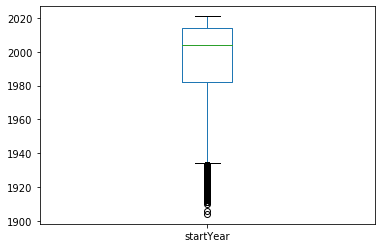

In [19]:
df.startYear.plot.box()
plt.show()

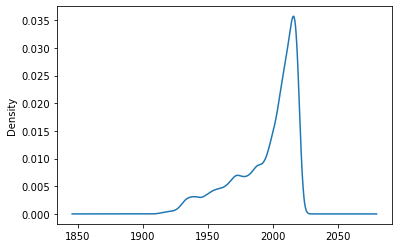

In [20]:
df.startYear.plot.kde()
plt.show()

Let us now check the runtime minutes. We have about 1401 values which are missing for run time. There are multiple ways to deal with this (remove these null values, replace them with a metrics or interpolate these values). Since we have 1401 values, I did not want to loose this much data, So I decided to replace these with mean (which is 99.67). Also looking at the boxplot it shows that we have some outliers, but one is really odd, it has a value of 5000 minutes, so I decided to remove it. Histogram shows that most movies are between 70 - 120 mimutes long.

In [21]:
df.runtimeMinutes.isnull().sum()

1401

In [22]:
df.runtimeMinutes.mean()

99.67314248496382

In [23]:
df[df.runtimeMinutes.isnull()].runtimeMinutes = df.runtimeMinutes.mean()

E:\software_data\Anaconda\envs\Data Science\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


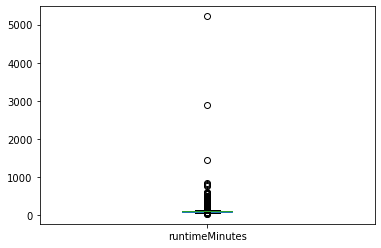

In [24]:
df.runtimeMinutes.plot.box()
plt.show()

In [25]:
df = df[df.runtimeMinutes < 4000]

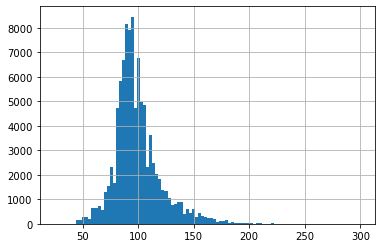

In [26]:
df.runtimeMinutes[df.runtimeMinutes < 300].hist(bins=100)
plt.show()

We also checked genre for these movies. The bar plot shows that, The top movie genre category is Drama, followed by Comedy and Romance.

In [27]:
df_genres = df.genres.str.get_dummies( sep=',')
df_genres.head()

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
374,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
758,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
933,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
983,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
991,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


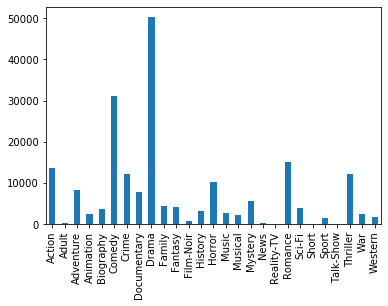

In [28]:
df_genres.sum().plot(kind='bar')
plt.show()

Lets add this to the main dataset and drop the genre category.

In [29]:
gen_class = []
for col in df_genres.columns:
    gen_class.append("genre_"+col)

df_genres.columns = gen_class

In [30]:
df = pd.concat([df, df_genres], axis=1)
df = df.drop(["genres"], axis=1)
df.head()

,tconst,averageRating,numVotes,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genre_Action,genre_Adult,...,genre_News,genre_Reality-TV,genre_Romance,genre_Sci-Fi,genre_Short,genre_Sport,genre_Talk-Show,genre_Thriller,genre_War,genre_Western
374,tt0000574,6.1,631,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906.0,70.0,1,0,...,0,0,0,0,0,0,0,0,0,0
758,tt0001258,5.7,101,The White Slave Trade,Den hvide slavehandel,0,1910.0,45.0,0,0,...,0,0,0,0,0,0,0,0,0,0
933,tt0001892,5.8,194,Den sorte drøm,Den sorte drøm,0,1911.0,53.0,0,0,...,0,0,0,0,0,0,0,0,0,0
983,tt0002101,5.2,462,Cleopatra,Cleopatra,0,1912.0,100.0,0,0,...,0,0,0,0,0,0,0,0,0,0
991,tt0002130,7.1,2430,Dante's Inferno,L'Inferno,0,1911.0,71.0,0,0,...,0,0,0,0,0,0,0,0,0,0


We have about 294 rows which are listed as adult

In [31]:
df.isAdult.value_counts()

0    97968
1      294
Name: isAdult, dtype: int64

## Analysis

Now that we have prepared the dataset. We will be using it for the analysis. The main goal is to predict the average rating. We removed other columsn like "tconst", "primarytitle" and "orginalTitle".

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98262 entries, 374 to 1141944
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             98262 non-null  object 
 1   averageRating      98262 non-null  float64
 2   numVotes           98262 non-null  int64  
 3   primaryTitle       98262 non-null  object 
 4   originalTitle      98262 non-null  object 
 5   isAdult            98262 non-null  int32  
 6   startYear          98262 non-null  float64
 7   runtimeMinutes     98262 non-null  float64
 8   genre_Action       98262 non-null  int64  
 9   genre_Adult        98262 non-null  int64  
 10  genre_Adventure    98262 non-null  int64  
 11  genre_Animation    98262 non-null  int64  
 12  genre_Biography    98262 non-null  int64  
 13  genre_Comedy       98262 non-null  int64  
 14  genre_Crime        98262 non-null  int64  
 15  genre_Documentary  98262 non-null  int64  
 16  genre_Drama       

In [33]:
df_analysis = df.drop(["tconst", "numVotes", "primaryTitle", "originalTitle"], axis=1)
df_analysis.head()

,averageRating,isAdult,startYear,runtimeMinutes,genre_Action,genre_Adult,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,...,genre_News,genre_Reality-TV,genre_Romance,genre_Sci-Fi,genre_Short,genre_Sport,genre_Talk-Show,genre_Thriller,genre_War,genre_Western
374,6.1,0,1906.0,70.0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
758,5.7,0,1910.0,45.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
933,5.8,0,1911.0,53.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
983,5.2,0,1912.0,100.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
991,7.1,0,1911.0,71.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
len(df_analysis)

98262

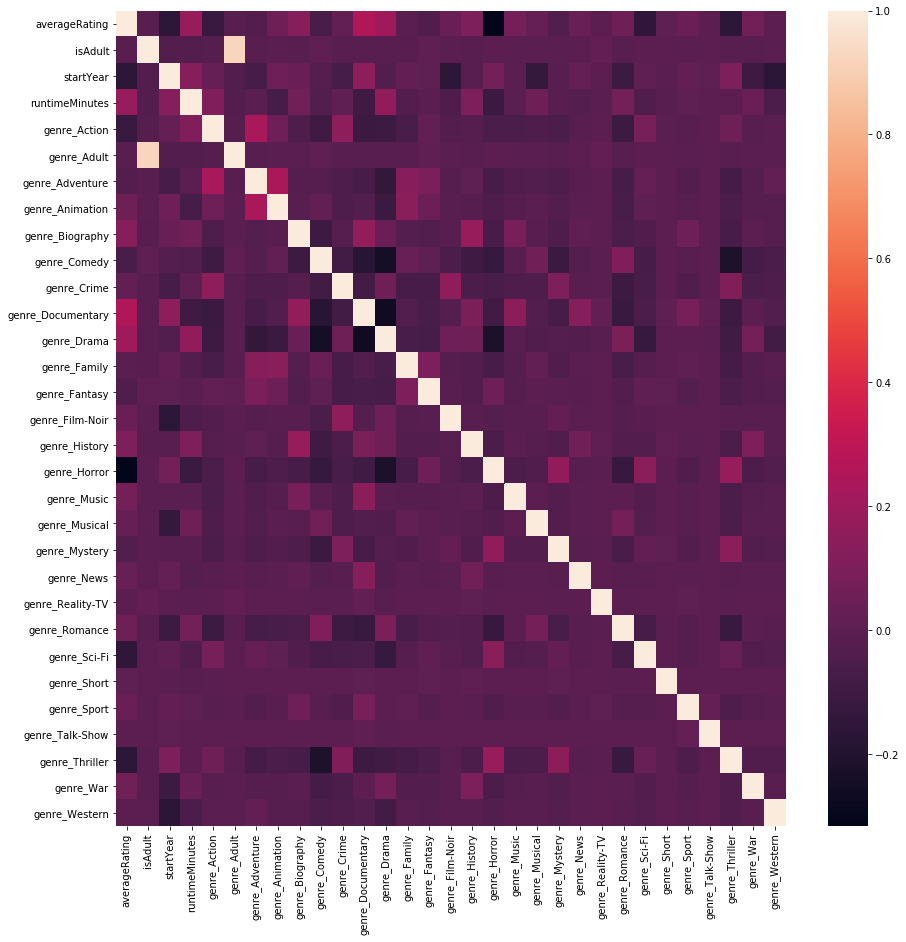

In [35]:
plt.figure(figsize=(15,15))
sns.heatmap(df_analysis.corr())
plt.show()

All the columns looks non related, except "genre_adult" and "isAdult" which are highly realated. So I decided to remove "isAdult" Column.

In [36]:
df_analysis = df_analysis.drop(["isAdult"], axis=1)

In [37]:
Y = df_analysis.averageRating
X = df_analysis.drop(["averageRating"], axis=1)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size = 0.15,
                                                   random_state=1289)

In [39]:
print("Length of train set: ", len(x_train))
print("Length of test set: ", len(x_test))

Length of train set:  83522
Length of test set:  14740


#### Model

In [40]:
import statsmodels.api as sm
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          averageRating   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                          1.015e+05
Date:                Mon, 19 Apr 2021   Prob (F-statistic):                        0.00
Time:                        06:03:51   Log-Likelihood:                     -1.4863e+05
No. Observations:               98262   AIC:                                  2.973e+05
Df Residuals:                   98233   BIC:                                  2.976e+05
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
startYear             0.0024   8.89e-06    272.792      0.000       0.002       0.002
runtimeMinutes        0.0081      0.000     56.253      0.000       0.008       0.008
genre_Action         -0.3195      0.011    -28.563      0.000      -0.341      -0.298
genre_Adult           0.0686      0.068      1.007      0.314      -0.065       0.202
genre_Adventure       0.0762      0.014      5.509      0.000       0.049       0.103
genre_Animation       0.7566      0.024     31.275      0.000       0.709       0.804
genre_Biography       0.2710      0.019     14.075      0.000       0.233       0.309
genre_Comedy          0.0362      0.009      3.921      0.000       0.018       0.054
genre_Crime           0.1735      0.011     15.206      0.000       0.151       0.196
genre_Documentary     1.3425      0.016     83.594      0.000       1.311       1.374
genre_Drama           0.5034      0.009     55.773      0.000       0.486       0.521
genre_Family         -0.0533      0.018     -2.985      0.003      -0.088      -0.018
genre_Fantasy         0.0554      0.018      3.097      0.002       0.020       0.090
genre_Film-Noir       0.6571      0.043     15.279      0.000       0.573       0.741
genre_History         0.1993      0.021      9.634      0.000       0.159       0.240
genre_Horror         -0.8126      0.013    -61.906      0.000      -0.838      -0.787
genre_Music           0.2138      0.022      9.649      0.000       0.170       0.257
genre_Musical         0.2974      0.025     12.137      0.000       0.249       0.345
genre_Mystery         0.2046      0.016     13.047      0.000       0.174       0.235
genre_News            0.1391      0.094      1.488      0.137      -0.044       0.322
genre_Reality-TV     -0.3137      0.389     -0.807      0.419      -1.075       0.448
genre_Romance         0.1105      0.010     10.749      0.000       0.090       0.131
genre_Sci-Fi         -0.3416      0.019    -18.223      0.000      -0.378      -0.305
genre_Short           0.9962      0.634      1.570      0.116      -0.247       2.239
genre_Sport           0.0753      0.029      2.622      0.009       0.019       0.132
genre_Talk-Show      -0.1816      1.099     -0.165      0.869      -2.335       1.972
genre_Thriller       -0.2180      0.012    -18.446      0.000      -0.241      -0.195
genre_War             0.3266      0.023     14.511      0.000       0.282       0.371
genre_Western         0.3941      0.027     14.462      0.000       0.341       0.448
==============================================================================
Omnibus:                    17091.005   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69214

So according to stat models, OLS model, Genres like Reality Tv, News, short, Talk shows are not significant in predicting ratings. While Animation, Biography, Documentry, Drama, War and others have positive impact. Animations and Documentry have huge positive impact. While, Horror, scifi and Reality Tv have a negative impact. The R2 score is 0.968 which means that this model explains 96.8% of the variance. Lets try some other models too.

#### Linear Model

In [41]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
print("Test Metrics:")
y_pred = model.predict(x_test)
print("\t MAE: ", mean_absolute_error(y_test, y_pred))
print("\t MSE: ", mean_squared_error(y_test, y_pred))
print("\t R2 Score: ", r2_score(y_test, y_pred))

print("\nTrain Metrics:")
y_pred = model.predict(x_train)

print("\t MAE: ", mean_absolute_error(y_train, y_pred))
print("\t MSE: ", mean_squared_error(y_train, y_pred))
print("\t R2 Score: ", r2_score(y_train, y_pred))

Test Metrics:
	 MAE:  0.8031930717035161
	 MSE:  1.1058529733883216
	 R2 Score:  0.2974845408687705

Train Metrics:
	 MAE:  0.8047912218544078
	 MSE:  1.119101349697162
	 R2 Score:  0.2910977017161811


In [43]:
features = list(x_train.columns)
importance = model.coef_
for i,v in zip(features, importance):
    print('Feature: %s, Score: %.5f' % (i,v))

Feature: startYear, Score: -0.01114
Feature: runtimeMinutes, Score: 0.00924
Feature: genre_Action, Score: -0.28780
Feature: genre_Adult, Score: -0.07879
Feature: genre_Adventure, Score: -0.04114
Feature: genre_Animation, Score: 0.89211
Feature: genre_Biography, Score: 0.30286
Feature: genre_Comedy, Score: 0.02593
Feature: genre_Crime, Score: 0.08477
Feature: genre_Documentary, Score: 1.50326
Feature: genre_Drama, Score: 0.48982
Feature: genre_Family, Score: -0.02503
Feature: genre_Fantasy, Score: 0.05096
Feature: genre_Film-Noir, Score: 0.07791
Feature: genre_History, Score: 0.13334
Feature: genre_Horror, Score: -0.77584
Feature: genre_Music, Score: 0.14108
Feature: genre_Musical, Score: -0.00171
Feature: genre_Mystery, Score: 0.15445
Feature: genre_News, Score: 0.25523
Feature: genre_Reality-TV, Score: -0.32364
Feature: genre_Romance, Score: 0.03798
Feature: genre_Sci-Fi, Score: -0.36512
Feature: genre_Short, Score: 0.87977
Feature: genre_Sport, Score: 0.07757
Feature: genre_Talk-Show

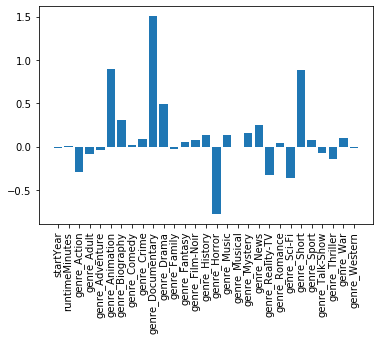

In [44]:
plt.bar(features, importance)
plt.xticks(rotation = 90)
plt.show()

So for Linear model we got an MAE of 0.8, but the R2 score is low. Documentry and Animation seems to be positive. Horror has a negative impact.

#### Random Forest 

In [45]:
model = RandomForestRegressor(random_state=1289)
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1289, verbose=0, warm_start=False)

In [46]:
print("Test Metrics:")
y_pred = model.predict(x_test)
print("\t MAE: ", mean_absolute_error(y_test, y_pred))
print("\t MSE: ", mean_squared_error(y_test, y_pred))
print("\t R2 Score: ", r2_score(y_test, y_pred))

print("\nTrain Metrics:")
y_pred = model.predict(x_train)

print("\t MAE: ", mean_absolute_error(y_train, y_pred))
print("\t MSE: ", mean_squared_error(y_train, y_pred))
print("\t R2 Score: ", r2_score(y_train, y_pred))

Test Metrics:
	 MAE:  0.8337189150722194
	 MSE:  1.2096461637665703
	 R2 Score:  0.2315478182230324

Train Metrics:
	 MAE:  0.4247587244153509
	 MSE:  0.35761078827901566
	 R2 Score:  0.7734690340864261


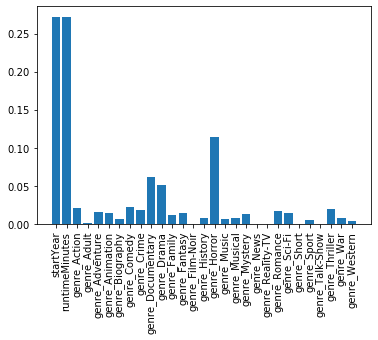

In [47]:
importance = model.feature_importances_
plt.bar(features, importance)
plt.xticks(rotation = 90)
plt.show()

According to random forest, Start Year and runtime minutes are the most important features, Genre Horror is also important. The R2 score for Test is low for Random FOrest while for Train set it is really good. This means that the model is overfitting.

#### Neural Network

In [48]:
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

In [49]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

num_features = X.shape[1]
hidden_layer_nodes=64

def NeuralModel():
    model = Sequential()
    model.add(Dense(64, input_dim=num_features, 
                    kernel_initializer='normal'))
    model.add(Dense(256, 
                    kernel_initializer='normal', 
                    activation='relu'))
    model.add(Dense(512, 
                    kernel_initializer='normal', 
                    activation='relu'))
    model.add(Dense(256, 
                    kernel_initializer='normal', 
                    activation='relu'))
    model.add(Dense(64, 
                    kernel_initializer='normal', 
                    activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', 
                  optimizer='adam', 
                  metrics=['MSE'])
    return model

In [50]:
model = NeuralModel()

nn = model.fit(x_train, y_train, 
               validation_data=(x_test, y_test), 
               epochs=100, 
               batch_size=200,
              verbose=0)

In [51]:
print("Test Metrics:")
y_pred = model.predict(x_test)
print("\t MAE: ", mean_absolute_error(y_test, y_pred))
print("\t MSE: ", mean_squared_error(y_test, y_pred))
print("\t R2 Score: ", r2_score(y_test, y_pred))

print("\nTrain Metrics:")
y_pred = model.predict(x_train)

print("\t MAE: ", mean_absolute_error(y_train, y_pred))
print("\t MSE: ", mean_squared_error(y_train, y_pred))
print("\t R2 Score: ", r2_score(y_train, y_pred))

Test Metrics:
	 MAE:  0.8071258676650567
	 MSE:  1.116199779266517
	 R2 Score:  0.29091152324619207

Train Metrics:
	 MAE:  0.8075119751480152
	 MSE:  1.1139270413186777
	 R2 Score:  0.2943754022591474


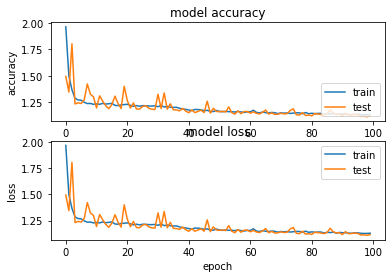

In [52]:
plt.subplot(2,1,1)
plt.plot(nn.history['MSE'])
plt.plot(nn.history['val_MSE'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(nn.history['loss'])
plt.plot(nn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

## Summary

For this project we started by combining some of the datasets provided by IMDb datasets. We had to predict the average rating of a movie. Finally after preparing the dataset we had about 29 features. The main ones are Start Year, Run time and Genres.

Firstly we check which are the most important features using Statmodels OLS model and found that  Genres like Reality Tv, News, short, Talk shows are not significant in predicting ratings. While Animation, Biography, Documentry, Drama, War and others have positive impact. Start year and run time are also important (these have a positive impact on the rating).

Next we tried Linear Model and RandomForest model with this datasets. Linear modle got an MAE of 0.8, but the R2 score is 0.30. Documentry and Animation seems to be positive. Horror has a negative impact. Start year and run time are a little positive which mean recent movies and Longer have slightly positive rating. Random Forest also showed almost the same thing.

Lastly we tried a Neural Network. We got Good Score with the neural network. I believe with more time this neural network will perform better.